<img src="image.png">

In [1]:
import numpy as np

A = np.array([3,1,1])
B = np.array([6.5,1,1.5])
C = np.array([5.5,3,2.5])
D = np.array([0.5,-1,-0.5])
E = np.array([-0.5,1,0.5])

# Creating the matrix

In [2]:
X = np.vstack((A,B,C,D,E))
X

array([[ 3. ,  1. ,  1. ],
       [ 6.5,  1. ,  1.5],
       [ 5.5,  3. ,  2.5],
       [ 0.5, -1. , -0.5],
       [-0.5,  1. ,  0.5]])

# Standardizing the matrix

In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.28662559,  0.        ,  0.5       ],
       [ 0.91901828,  1.58113883,  1.5       ],
       [-0.91901828, -1.58113883, -1.5       ],
       [-1.28662559,  0.        , -0.5       ]])

# Computing the covariance matrix

In [4]:
X_covariance_matrix = np.cov(X_std.T)

In [5]:
X_covariance_matrix

array([[1.25      , 0.72654774, 1.01092011],
       [0.72654774, 1.25      , 1.18585412],
       [1.01092011, 1.18585412, 1.25      ]])

# Finding Eigenvalues and Eigenvectors

In [6]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print("Eigenvectors:\n", eig_vecs)
print()
print("Eigenvalues:\n", eig_vals)

Eigenvectors:
 [[-0.53316412 -0.7908806  -0.30040623]
 [-0.57364312  0.59894778 -0.55874424]
 [-0.62182762  0.12557641  0.77302068]]

Eigenvalues:
 [ 3.21074177e+00  5.39258228e-01 -1.72370688e-17]


Making a list of tuples, in order to sort them

In [7]:
#list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order
3.2107417718560276
0.5392582281439726
1.7237068842761345e-17


The goal here is to find the percentages of variation that each PC accounts for

In [8]:
# contribution of each PC
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ('Variance captured by each component is \n', var_exp)
print(40* '-')
print ('Cumulative variance \n', cum_var_exp)

Variance captured by each component is 
 [85.6197805828274, 14.380219417172604, -4.596551691403025e-16]
----------------------------------------
Cumulative variance 
 [ 85.61978058 100.         100.        ]


As we can see:
- PC 1 has ~85% of contribution
- PC 2 has ~14% of contribution

In [9]:
import pprint
print("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40*'-')

All Eigen Values along with Eigen Vectors
[(3.2107417718560276, array([-0.53316412, -0.57364312, -0.62182762])),
 (0.5392582281439726, array([-0.7908806 ,  0.59894778,  0.12557641])),
 (1.7237068842761345e-17, array([-0.30040623, -0.55874424,  0.77302068]))]
----------------------------------------


# For 2-Dim

In [10]:
matrix_w2 = np.hstack((eig_pairs[0][1].reshape(3,1),
                     eig_pairs[1][1].reshape(3,1)))

print('Matrix W for 2-Dim: \n', matrix_w2)

Matrix W for 2-Dim: 
 [[-0.53316412 -0.7908806 ]
 [-0.57364312  0.59894778]
 [-0.62182762  0.12557641]]


In [11]:
Y2 = X_std.dot(matrix_w2)
Y2

array([[ 0.        ,  0.        ],
       [-0.99689641, -0.95477901],
       [-2.32973842,  0.40855049],
       [ 2.32973842, -0.40855049],
       [ 0.99689641,  0.95477901]])

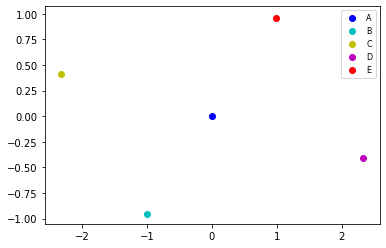

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['b', 'c', 'y', 'm', 'r']

A = plt.scatter(Y2[0,0], Y2[0,1], color=colors[0])
B = plt.scatter(Y2[1,0], Y2[1,1], color=colors[1])
C  = plt.scatter(Y2[2,0], Y2[2,1], color=colors[2])
D  = plt.scatter(Y2[3,0], Y2[3,1], color=colors[3])
E  = plt.scatter(Y2[4,0], Y2[4,1], color=colors[4])

plt.legend((A, B, C, D, E),
           ('A', 'B', 'C', 'D', 'E'),
           scatterpoints=1,
           ncol=1,
           fontsize=8)

plt.show()

# 1-Dim

In [13]:
matrix_w1 = eig_pairs[0][1].reshape(3,1)

print('Matrix W: \n', matrix_w1)

Matrix W: 
 [[-0.53316412]
 [-0.57364312]
 [-0.62182762]]


In [14]:
Y1 = X_std.dot(matrix_w1)
Y1

array([[ 0.        ],
       [-0.99689641],
       [-2.32973842],
       [ 2.32973842],
       [ 0.99689641]])

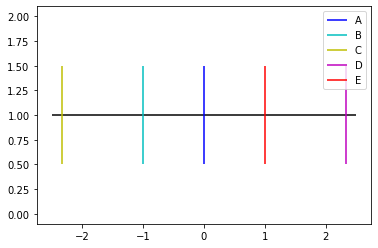

In [24]:
plt.figure()
ax1 = plt.hlines(1,-2.5,2.5)  # Draw a horizontal line

A = plt.eventplot(Y1[0], color=colors[0], label = 'A')
B = plt.eventplot(Y1[1], color=colors[1], label = 'B')
C  = plt.eventplot(Y1[2], color=colors[2], label = 'C')
D  = plt.eventplot(Y1[3], color=colors[3], label = 'D')
E  = plt.eventplot(Y1[4], color=colors[4], label = 'E')

plt.legend()